In [89]:
from qiskit_aer import AerSimulator
from qiskit.circuit.library import EfficientSU2
import numpy as np
from scipy.optimize import minimize
from qiskit import transpile, qasm3
from qiskit.quantum_info import Statevector, state_fidelity
import matplotlib.pyplot as plt

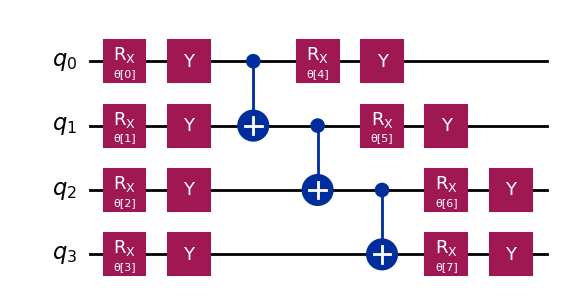

In [90]:
simulator_aer = AerSimulator()

# Define the EfficientSU2 ansatz with 4 qubits
ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)
ansatz.decompose().draw("mpl")


In [91]:
# Define the target state |1111>
target_state = Statevector.from_label('1111')# Define the cost function
def cost_function(params):
    # Create a new circuit with the ansatz and assign the parameters
    bound_circuit = ansatz.assign_parameters(params)   
    bound_circuit.save_statevector()
    # Get the statevector from the circuit
    qc_aer = transpile(bound_circuit, backend=simulator_aer)
    result = simulator_aer.run(qc_aer).result()
    output_state = result.get_statevector()
    
    # Calculate fidelity
    fidelity = state_fidelity(output_state, target_state)
    
    # Return infidelity
    return 1 - fidelity

In [92]:
# Number of parameters in the ansatz
num_params = ansatz.num_parameters

# Initialize parameters randomly
initial_params = np.random.uniform(0, 2*np.pi, num_params)

# Perform the optimization
result = minimize(cost_function, initial_params, method='COBYLA', options={'maxiter': 1000, 'disp': True})

# Extract optimized parameters
optimized_params = result.x

print("Optimization Success:", result.success)
print("Final Infidelity:", result.fun)

Optimization Success: True
Final Infidelity: 3.1731748340035892e-09


Final Fidelity: 0.9999999968268252


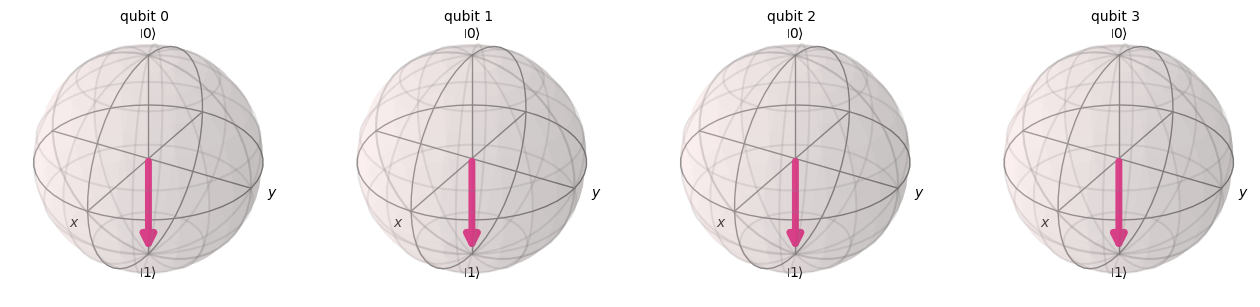

In [93]:
# Bind the optimized parameters
final_circuit = ansatz.assign_parameters(optimized_params)
# Save the qasm file of the circuit
qasm_str = qasm3.dumps(final_circuit.decompose())
final_circuit.save_statevector()
# Execute the circuit
qc_aer = transpile(final_circuit, backend=simulator_aer)
result = simulator_aer.run(qc_aer).result()
final_state = result.get_statevector()

# Calculate fidelity
final_fidelity = state_fidelity(final_state, target_state)
print("Final Fidelity:", final_fidelity)

# Optional: Visualize the final state
# This will create Bloch sphere representations for each qubit
state = Statevector(final_state)
state.draw('bloch')

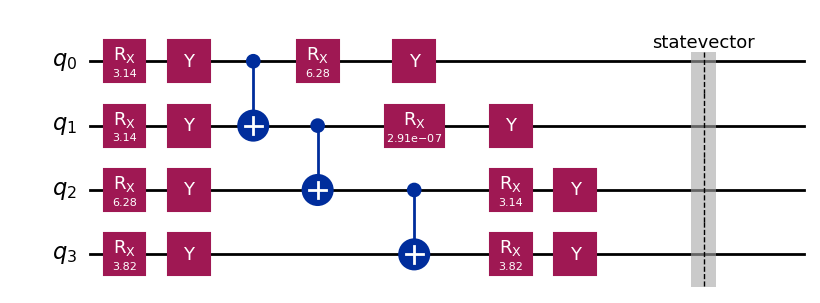

In [94]:
# Draw the final circuit
final_circuit.decompose().draw('mpl')

In [95]:
print("Final State:", final_state)

Final State: Statevector([-3.04255171e-05+3.70512105e-10j,
              1.23779270e-05-9.13028966e-10j,
             -2.00853983e-14-4.76673037e-10j,
             -1.57767759e-05+4.72510280e-10j,
              1.84262371e-14+7.04242331e-10j,
             -2.51047032e-14-2.89460683e-10j,
             -1.86920041e-14-6.08730226e-10j,
             -2.03362271e-05+3.65176157e-10j,
             -1.87461927e-14-6.18740228e-10j,
              2.30876878e-14+2.55084554e-10j,
              1.84107914e-14+6.92849073e-10j,
              2.31464375e-05-3.20840098e-10j,
             -2.02218561e-14-4.84367220e-10j,
             -1.45344955e-07+1.95283781e-10j,
             -2.99332920e-05+3.76604831e-10j,
             -1.89114082e-14+9.99999998e-01j],
            dims=(2, 2, 2, 2))


In [96]:
print(qasm_str)

OPENQASM 3.0;
include "stdgates.inc";
qubit[4] q;
rx(3.141653504624132) q[0];
y q[0];
rx(3.141617409443881) q[1];
y q[1];
cx q[0], q[1];
rx(6.283245173763704) q[0];
y q[0];
rx(6.283216860731434) q[2];
y q[2];
cx q[1], q[2];
rx(2.9068995150273533e-07) q[1];
y q[1];
rx(3.8216543619490615) q[3];
y q[3];
cx q[2], q[3];
rx(3.141546360714775) q[2];
y q[2];
rx(3.8216950344033918) q[3];
y q[3];

